In [53]:
# forked from https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook

In [65]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from _utils.u_constant import PATH_ROOT

path = PATH_ROOT + "Code projects/Python/kaggle/House Prices Advanced Regression Techniques/"

In [55]:
df_train = pd.read_csv(path + "train.csv")
df_train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 1. EDA

### 1.1 Label explore

Skewness: 1.882876
Kurtosis: 6.536282


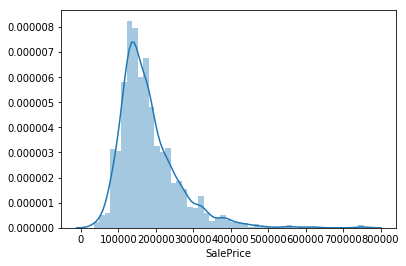

In [56]:
sns.distplot(df_train["SalePrice"])
print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

### 1.2 Relationship with numerical variables

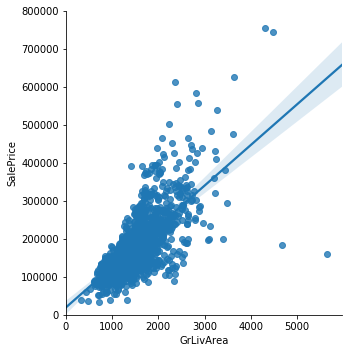

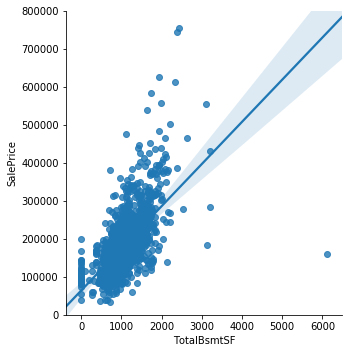

In [57]:
for var in ["GrLivArea", "TotalBsmtSF"]:
    g = sns.lmplot(var, "SalePrice", data=df_train)
    g.set(ylim=(0, 800000))
    plt.show()

### 1.3 Relationship with categorical features

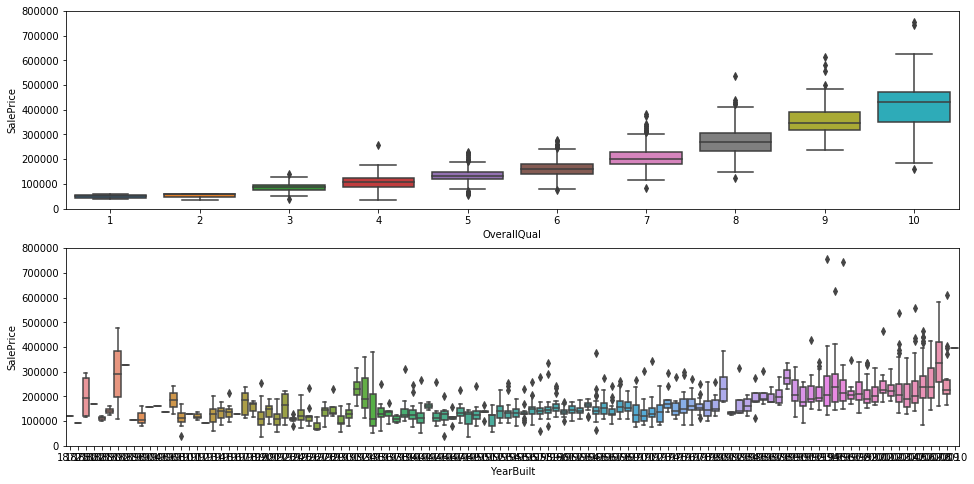

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
for i, var in enumerate(["OverallQual", "YearBuilt"]):
    ax = axes[i]
    g = sns.boxplot(x=var, y="SalePrice", data=df_train, ax=ax)
    g.set(ylim=(0, 800000))
fig.show()

### 1.4 Correlationship between variables

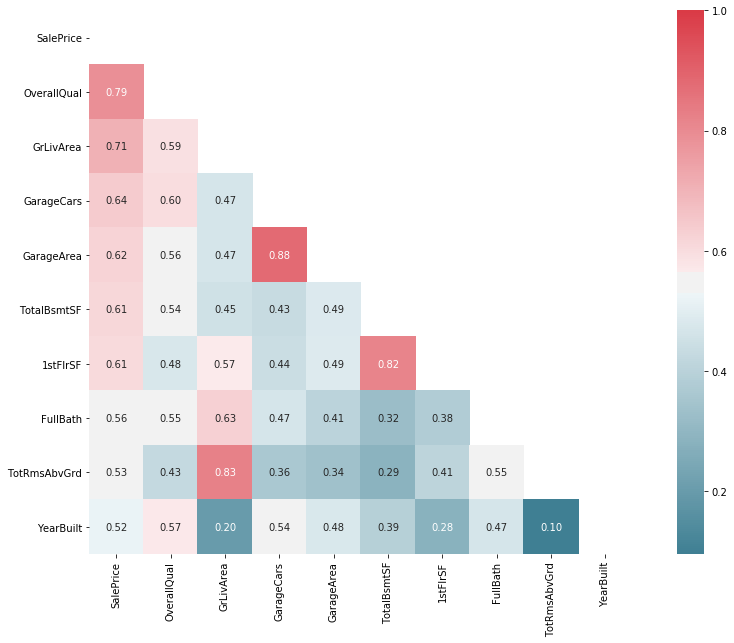

In [59]:
corrmat = df_train.corr()
k = 10  # select topk variables
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index.values
cm = df_train[cols].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(h_neg=220, h_pos=10, as_cmap=True)

fig, axe = plt.subplots(figsize=(16, 10))
g = sns.heatmap(cm, mask=mask, cmap=cmap, square=True, annot=True, fmt="0.2f", ax=axe)
fig.show()

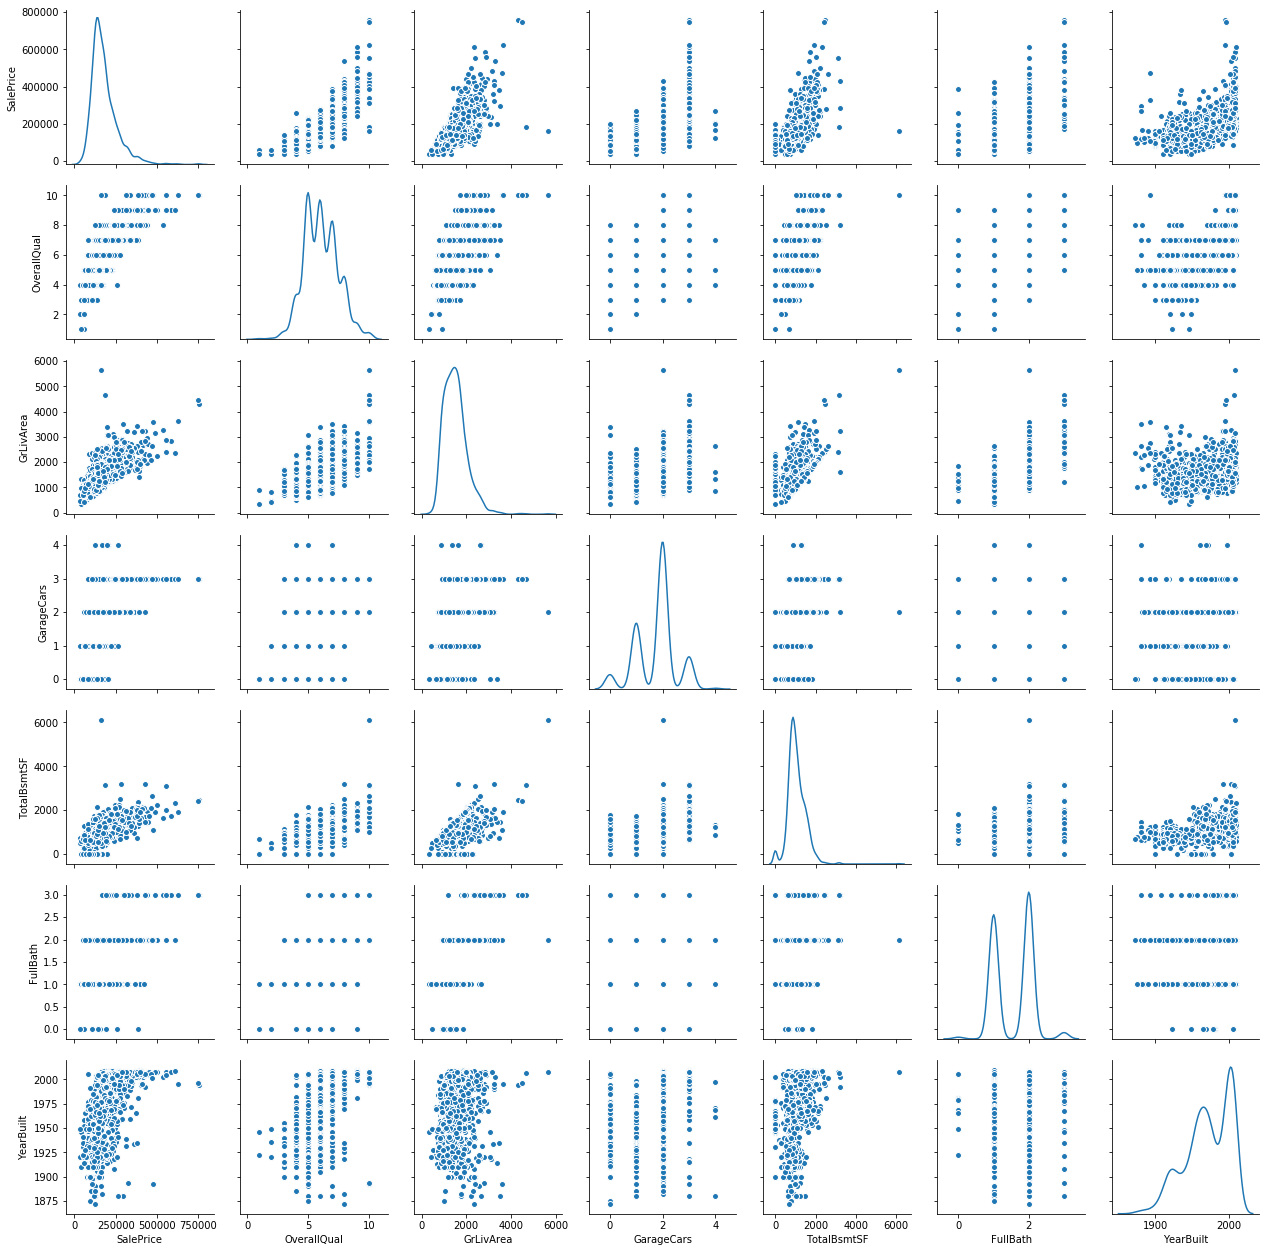

In [60]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], diag_kind="kde")

### 1.5 Missing Data

In [61]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = total / len(df_train)
missing_summary = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_summary.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [62]:
df_train = df_train.drop(missing_summary[missing_summary["Total"] > 1].index, axis=1)
df_train = df_train.drop(df_train[df_train["Electrical"].isnull()].index, axis=0)
sum(df_train.isnull().sum())

0

### 1.5 Outliers

In [63]:
# ScalePrice
ss = StandardScaler()
scaleprice_scaled = np.sort(ss.fit_transform(df_train["SalePrice"][:, np.newaxis]), axis=0)
low_range = scaleprice_scaled[:10]
high_range = scaleprice_scaled[-10:]
print('outer range (low) of the distribution:')
print(low_range)
print("\n")
print('outer range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]


outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


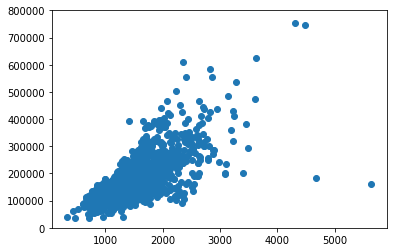

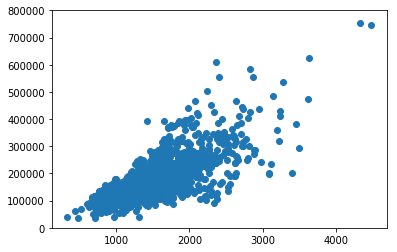

In [64]:
# GrLivArea
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.ylim(0, 800000)
plt.show()

# delete two lower right points
df_train = df_train.drop(df_train[(df_train["GrLivArea"] > 4000) & (df_train["SalePrice"] < 300000)].index, axis=0)
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.ylim(0, 800000)
plt.show()

### 1.6 Normalty

In [68]:
def normalty_plot(value):
    fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    sns.distplot(value, fit=ss.norm, ax=axe[0])
    ss.probplot(value, plot=axe[1])
    fig.show()

#### 1.6.1 SalePrice

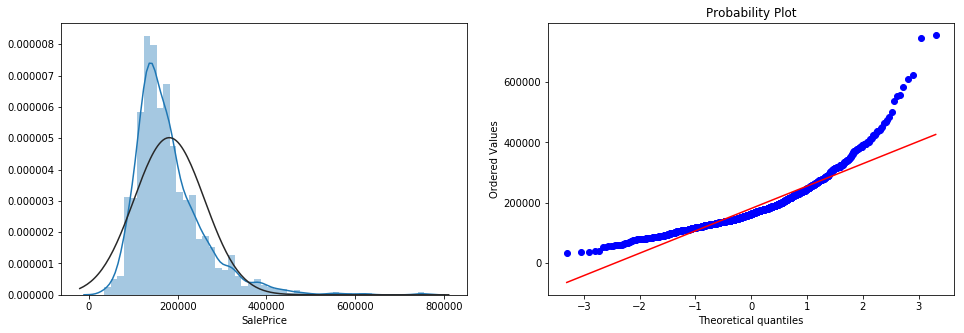

In [69]:
normalty_plot(df_train["SalePrice"])
# SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

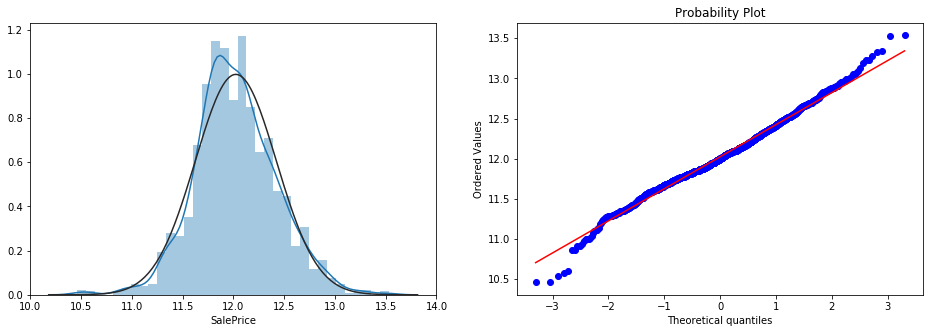

In [70]:
# transform by log
normalty_plot(np.log(df_train["SalePrice"]))
# much more better

In [72]:
df_train["SalePrice"] = np.log(df_train["SalePrice"])

#### 1.6.2 GrLivArea

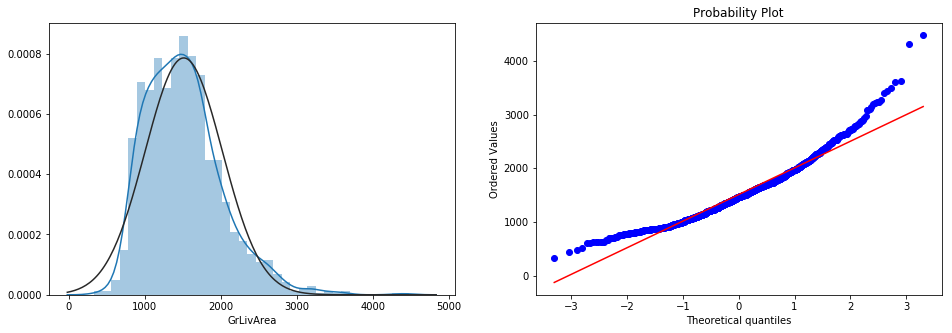

In [71]:
normalty_plot(df_train["GrLivArea"])
# Tastes like skewness...

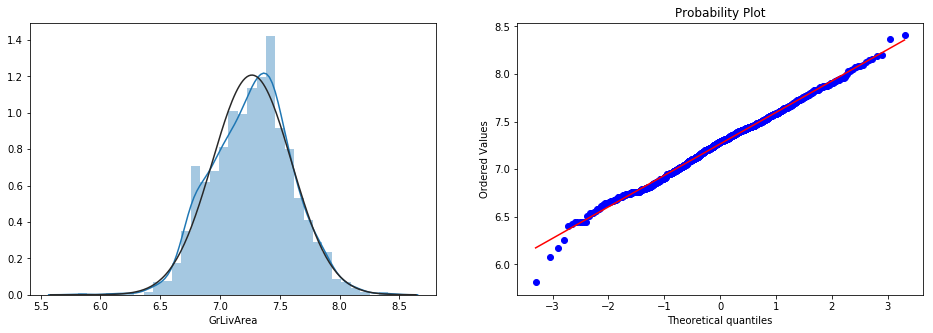

In [73]:
# transform by log
normalty_plot(np.log(df_train["GrLivArea"]))
# much more better

In [74]:
df_train["GrLivArea"] = np.log(df_train["GrLivArea"])

#### 1.6.3 TotalBsmtSF

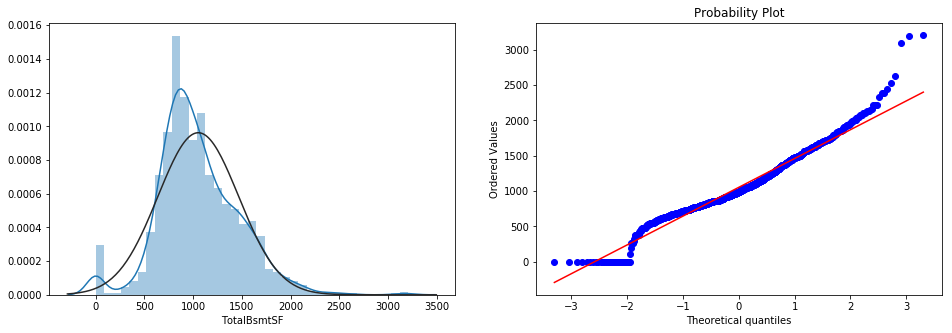

In [75]:
normalty_plot(df_train["TotalBsmtSF"])
# a lot of zeroes and couldn't transform by log
# left skew

In [77]:
df_train["HasBsmt"] = (df_train["TotalBsmtSF"] > 0).astype(int)
df_train.loc[df_train["HasBsmt"] == 1, "TotalBsmtSF"] = np.log(df_train["TotalBsmtSF"])

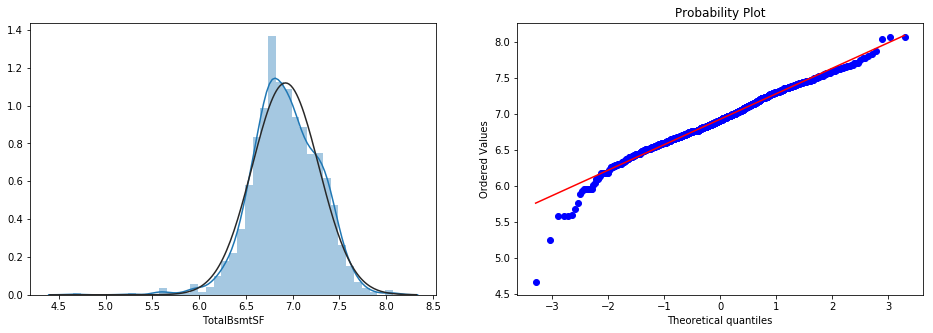

In [80]:
normalty_plot(df_train.loc[df_train["HasBsmt"] == 1, "TotalBsmtSF"])

In [81]:
df_train2 = pd.get_dummies(df_train)
df_train2[:10]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0
